## Pavage par tatamis

Lorsque l'on loue un appartement ou une maison au Japon, la superficie des pièces n'est pas déterminée en mètres carrés mais en tatamis. Les tatamis sont des tapis de paille riz séchée (*goza*) montés sur des supports en bois, que l'on utilise traditionnellement pour paver le sol des pièces des maisons japonaises.

Une petite chambre d'étudiants fera ainsi 6 tatamis, c'est à dire qu'il est possible de placer 6 tatamis dans la pièce à vivre (sans compter l'entrée, le coin cuisine, les toilettes et la salle de bain). Un tatami peut être modélisé par un rectangle 2 × 1 ; la dimension des tatamis n'est pas définie de manière standard; les tatamis dans la région de Tôkyô (le Kantô) sont plus petits (88 × 176 cm) que les tatamis de la région de Kyôto (91 × 182 cm).

On propose ici de modéliser le problème avec `facile`, une bibliothèque de programmation par contraintes en Python, et d'analyser le nombre de dispositions possibles pour des tailles données.

In [1]:
import facile

En fonction de la disposition des pièces, il y a plusieurs manières de recouvrir l'espace au moyen de tatamis. Ce problème se modélise bien sous forme de problème de programmation par contraintes:

 - on modélise la position des tatamis par la position en abscisse et en ordonnée du coin le plus en bas à gauche ;
 - on modélise l'orientation du tatami par une variable supplémentaire ;
 - deux tatamis ne peuvent pas se chevaucher ;
 - tout l'espace est recouvert de tatamis (contrainte induite par la précédente et par le nombre de tatamis disponibles) ;
 
Enfin, une contrainte doit être rajoutée pour répondre aux standards d'esthétique japonaise: il est interdit d'avoir quatre tatamis qui se rejoignent en un point.

In [2]:
def tatami(xmax, ymax):
    
    # On ne travaille pas avec des demi-tatamis
    assert (xmax * ymax) & 1 == 0
    n = xmax * ymax // 2

    # Définitions des variables, x, y et direction
    # d = 1 => horizontal, d = 0 => vertical
    x = [facile.variable(0, xmax-1) for i in range(n)]
    y = [facile.variable(0, ymax-1) for i in range(n)]
    d = [facile.variable(0, 1) for i in range(n)]

    # Les tatamis ne sortent pas du cadre
    for i in range(n):
        facile.constraint(x[i] + 1 + d[i] <= xmax)
        facile.constraint(y[i] + 2 - d[i] <= ymax)
        
    # Les tatamis ne se chevauchent pas
    for i in range(n-1):
        for j in range(i+1, n):
            left = x[i] + 1 + d[i] <= x[j]
            right = x[i] >= x[j] + 1 + d[j]
            above = y[i] + 2 - d[i] <= y[j]
            below = y[i] >= y[j] + 2 - d[j]
            facile.constraint(left | right | above | below)

    # Impossible d'avoir 4 tatamis qui se rejoignent en un point
    for i in range(n-1):
        for j in range(i+1, n):        
            left = x[i] + 1 + d[i] != x[j]
            below = y[i] + 2 - d[i] != y[j]
            facile.constraint(left | below)
            
    # On casse les symétries
    for i in range(n-1):
        facile.constraint(x[i] <= x[i+1])
        facile.constraint((x[i] != x[i+1]) | (y[i] < y[i+1]))
            
    return facile.solve_all(x+y+d)

Pour garder un temps de résolution raisonnable, on choisit d'ajouter des contraintes pour casser un certain nombre de symétries. En effet, sachant qu'à partir d'une solution, il est possible d'intervertir deux tatamis pour trouver une autre solution en tout point semblable, on choisit d'ajouter une contrainte afin d'ordonner les tatamis en fonction d'une relation d'ordre en abscisses et en ordonnées.

On propose alors d'afficher les différentes solutions de la manière suivante.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

sns.set(style='whitegrid', palette='Set2')
sns.despine()

def fill_square(ax, x, y, xs, ys):
    ax.fill([x, x, x+xs, x+xs], [y, y+ys, y+ys, y])

def plot_sol(ax, x, y, d, xmax, ymax):
    for (xi, yi, di) in zip(x, y, d):
        fill_square(ax, xi, yi, 1+di, 2-di)

    ax.set_xlim((0, xmax))
    ax.set_ylim((0, ymax))
    ax.set_aspect(1)
    ax.set_xticks(range(xmax + 1))
    ax.set_yticks(range(ymax + 1))
    
def plot_tatami(sol, xmax, ymax):
    n = xmax * ymax // 2
    fig, ax = plt.subplots(ncols=len(sol), nrows=1,
                           figsize=(4*len(sol), 4))

    for i in range(len(sol)):
        x = sol[i][0:n]
        y = sol[i][n:2*n]
        d = sol[i][2*n:]
        plot_sol(ax[i], x, y, d, xmax, ymax)

Pour une pièce à six tatamis, on propose ici quatre solutions, mais il y a deux solutions qui sont images d'une première par symétries sur l'axe des abscisses ou sur l'axe des ordonnées. Il n'existe alors que deux solutions différentes possibles.

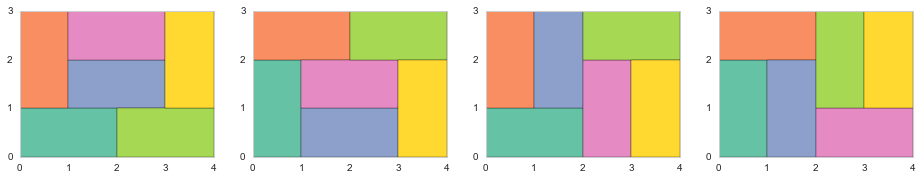

In [4]:
sol = tatami(4, 3)
plot_tatami(sol, 4, 3)

Pour une pièce à huit tatamis, les deux solutions sont images l'une de l'autre modulo une rotation de 90 degrés. Il n'y a en réalité qu'une disposition possible.

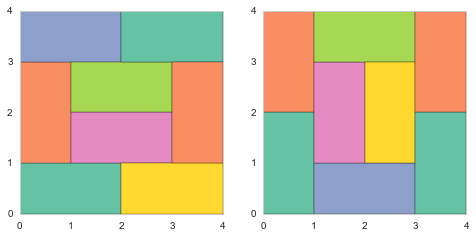

In [5]:
sol = tatami(4, 4)
plot_tatami(sol, 4, 4)

Pour une pièce à dix tatamis, la première et la troisième solution sont images l'une de l'autre par une symétrie sur l'axe des ordonnées. On n'a alors que deux solutions possibles.

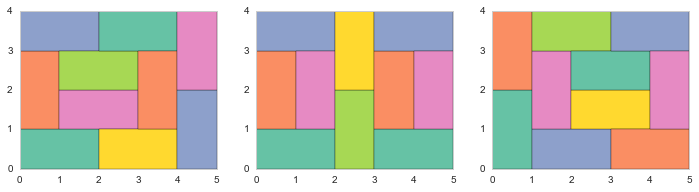

In [6]:
sol = tatami(5, 4)
plot_tatami(sol, 5, 4)

Sur une pièce à douze tatamis également, la première et la troisième solution sont images l'une de l'autre par une symétrie sur l'axe des ordonnées. On n'a alors que deux solutions possibles.

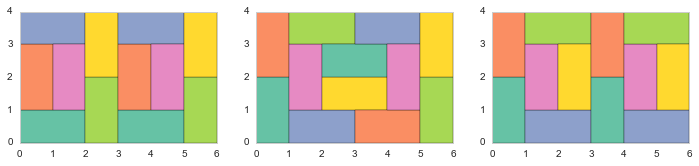

In [7]:
sol = tatami(6, 4)
plot_tatami(sol, 6, 4)

Sur une pièce à quinze tatamis, on n'a plus qu'une seule position possible une fois enlevée la deuxième solution qui n'est que l'image de la première par une symétrie sur l'axe des abscisses.

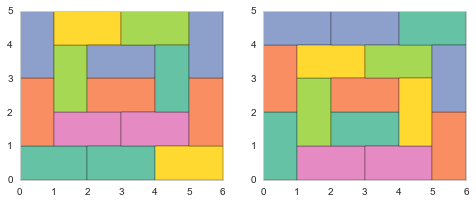

In [8]:
sol = tatami(6, 5)
plot_tatami(sol, 6, 5)

Sur les problèmes de programmation par contraintes, il est souvent possible de modifier la modélisation de notre problème pour casser certaines symétries mais il est souvent plus difficile de parvenir à détecter et à casser l'ensemble des symétries de notre problème.

L'étude des symétries dans ces problèmes est néanmoins un véritable axe de recherche au sein de cette classe de problèmes.